# Nature inspired optimization

## Task 1 - Genetic Algorithm

Write genetic algorithm in Python and solve the Knapsack problem.


Weights in Kg and costs in EUR for a set of 64 items are given. The goal of the optimization algorithm is to select items to knapsack so that the cost of items reaches the maximum and weight of items do not exceed the knapsack weight limit. 

After writing your algorithm change weights and costs to test the algorithm again.

In [2]:
# Example
import numpy as np
import random

# 64 items and their weights.
# Replace the weights with your own set of weights
# 
weights_of_items = np.array([
    2.3, 8.1, 6., 4.2, 1.3, 2.9, 7., 7.9,
    3.6, 5., 3.1, 5., 3.4, 5.3, 0.8, 6.9,
    9.8, 4.4, 5.4, 7.5, 4.6, 0.3, 9.2, 8.8,
    2.2, 3.3, 9.9, 7.6, 5.9, 4.2, 4.9, 5.8,
    4.4, 2.9, 0.1, 2.4, 5.6, 7.8, 7., 7.5,
    7.3, 7.4, 6.4, 1.6, 6.8, 4., 4.6, 4.1,
    0.5, 6.3, 5.2, 1.5, 9.7, 1.6, 2.6, 1.3,
    6.5, 2.6, 7.8, 6.3, 8.4, 9.4, 1.4, 7.5])
#
#  64 costs corresponding to weights
#  Replace the weights with your own set of weights
costs_of_items = [ 
           6.,  17.,  10., 26.,  19.,  81.,  67., 36.,
          21.,  33.,  13.,  5., 172., 138., 185., 27.,
           4.,   3.,  11., 19.,  95.,  90.,  24., 20.,
          28.,  19.,   7., 28.,  14.,  43.,  40., 12.,
          25.,  37.,  25., 16.,  85.,  20.,  15., 59.,
          72., 168.,  30., 57.,  49.,  66.,  75., 23.,
          79.,  20., 104.,  9.,  32.,  46.,  47., 55.,
          21.,  18.,  23., 44.,  61.,   8.,  42.,  1.]
#
# Knapsack weight limit 
# 
knapsack_weight_limit = 100
#
print("weight -> cost  | cost per kilo") 
for i in range(len(weights_of_items)):
  print("{:-4.1f}kg -> {:-4.0f}€ | {:.1f}".format(
      weights_of_items[i], costs_of_items[i], 
        costs_of_items[i]/weights_of_items[i]))


weight -> cost  | cost per kilo
 2.3kg ->    6€ | 2.6
 8.1kg ->   17€ | 2.1
 6.0kg ->   10€ | 1.7
 4.2kg ->   26€ | 6.2
 1.3kg ->   19€ | 14.6
 2.9kg ->   81€ | 27.9
 7.0kg ->   67€ | 9.6
 7.9kg ->   36€ | 4.6
 3.6kg ->   21€ | 5.8
 5.0kg ->   33€ | 6.6
 3.1kg ->   13€ | 4.2
 5.0kg ->    5€ | 1.0
 3.4kg ->  172€ | 50.6
 5.3kg ->  138€ | 26.0
 0.8kg ->  185€ | 231.2
 6.9kg ->   27€ | 3.9
 9.8kg ->    4€ | 0.4
 4.4kg ->    3€ | 0.7
 5.4kg ->   11€ | 2.0
 7.5kg ->   19€ | 2.5
 4.6kg ->   95€ | 20.7
 0.3kg ->   90€ | 300.0
 9.2kg ->   24€ | 2.6
 8.8kg ->   20€ | 2.3
 2.2kg ->   28€ | 12.7
 3.3kg ->   19€ | 5.8
 9.9kg ->    7€ | 0.7
 7.6kg ->   28€ | 3.7
 5.9kg ->   14€ | 2.4
 4.2kg ->   43€ | 10.2
 4.9kg ->   40€ | 8.2
 5.8kg ->   12€ | 2.1
 4.4kg ->   25€ | 5.7
 2.9kg ->   37€ | 12.8
 0.1kg ->   25€ | 250.0
 2.4kg ->   16€ | 6.7
 5.6kg ->   85€ | 15.2
 7.8kg ->   20€ | 2.6
 7.0kg ->   15€ | 2.1
 7.5kg ->   59€ | 7.9
 7.3kg ->   72€ | 9.9
 7.4kg ->  168€ | 22.7
 6.4kg ->   30€ | 4.7
 1.6kg

### Parameters of the algorithm



*   **chromosome_size** - dimension of the chromosome vector. We have 64 items so that the chromosome_size is equal to 64 
*   **population_size** - number of individuals in the population
*   **parent_count** - number of parents that are selected from the population on the base of the roulette selection. The parent count must be less than population size.
*   **probability_of_ones_in_a_new_chromosome** - probability which is used for initial population generation. It is probability of one in the initial chromosome. High values may lead to generation of many individuals with fitness equal to zero. This parameter is specific for our method of generation the initial chromosome. This parameter is meaningless if you choice another method.
* **probability_of_crossover** - probability of crossover
* **probability_of_mutation** - probability of mutation. We recommend to start at the value of 1/ga_chromosome_size and increase later









In [3]:
# Example

# Genetic algorithm parameters
ga_chromosome_size = len(weights_of_items)
ga_probability_of_ones_in_a_new_chromosome = 0.1
ga_probability_of_crossover = 0.3
ga_probability_of_mutation  = 1.0 / ga_chromosome_size
ga_population_size = 100
ga_parent_count = ga_population_size * 3 // 4 # 3/4 of the population size
ga_generations = 100

### Algorithm components

#### Fitness function definition

Let ${\bf w}$ is the weight vector, ${\bf c}$ is the cost vector, ${\bf g}$ is a chromosome and L is the weight limit, we define the fitness function as 

$$\text{fitness}({\bf g}) = 
\begin{cases}
  0 & \text{iff} \quad \sum_{i=0}^{N-1}w_ig_i > L \\
  \sum_{i=0}^{N-1}c_ig_i & \text{otherwise}
\end{cases}$$ 

Define the fitness function
```python
def fitness(w, c, L, g):
  return f #fitness
```


In [91]:
# Write your code here
def fitness(w, c, L, g):

  total_weight = sum(w[i] * g[i] for i in range(len(g)))
  total_cost = sum(c[i] * g[i] for i in range(len(g)))
  wg = np.round(total_weight,2)
  if total_weight > L:
    f = 0
  else:
    f = total_cost
  
  return f,wg #fitness

#### Chromosome Initialization

Let $p$ is the initialization probability for 1 in a new chromosome, $\psi$ is a random value with the unique distribution in the range of $<0,1>$ and ${\bf g}$ is a new chromosome then

$$g_i = 
\begin{cases}
  1 &  \text{iff} \quad \psi < p \\
  0 &  \text{otherwise}
\end{cases}$$ 

for all $i \in <0, N-1>$ where $N=|{\bf g}|$.

The $p$ should be sufficiently low to generate a valid solution with non-zero fitness. Check the validity of the solution after chromosome creation and recreate it if the total weight of the knapsack is above the weight limit $L$. More formally for a valid solution

$$\sum_{i=0}^{N-1}w_ig_i < L$$

where ${\bf w}$ is the weight vector. 

This is recommended, but not mandatory way how to initialize a new chromosome. Be aware that producing non-valid solutions with zero fitness at start may disturb the algorithm.

Define python function
```python
def generate_chromosome(N, w, L, p):
  pass
```


In [6]:
# Write your code here
def generate_chromosome(N, w, L, p):
  psi = np.random.uniform(0,1)
  g = np.zeros(64)
  for i in range(N):
    psi = np.random.uniform(0,1)
    if(psi < p):
      g[i] = 1
    else:
      g[i] = 0

  total_weight = sum(w[i] * g[i] for i in range(len(g)))
  if total_weight > L:
    return generate_chromosome(N,w,L,p)
  
  return g

#### Initialize the population

The population is represented by a numpy matrix. Rows of the matrix correspond to individuals, columns corresponds to genes in the chromosome. Our matrix has 64 columns because we have 64 items.

Call ```generate_chromosome()``` function for each row of the matrix.

Define python function

```python
def initialize_population(population_size,
         chromosome_size, weights, weight_limit,
         probability_of_ones_in_a_new_chromosome):
         ...
         return population
```        

In [11]:
# Write your code here
def initialize_population(population_size,chromosome_size, weights, weight_limit,probability_of_ones_in_a_new_chromosome):
  population = generate_chromosome(chromosome_size,weights,weight_limit,probability_of_ones_in_a_new_chromosome)
  for i in range(population_size-1):
    newrow = generate_chromosome(chromosome_size,weights,weight_limit,probability_of_ones_in_a_new_chromosome)
    population = np.vstack([population, newrow])

  return population

# p = (initialize_population(100,64,weights_of_items,100,0.1))
# print(p)
# print(p.shape)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(100, 64)


#### Evaluate fitness

Apply fitness function to all rows of the population matrix. The result is a vector of fitness values for all individuals in the population. The vector has the same size as the size of the population.

```
def evaluate_fitness(population, weights, costs, weight_limit)
  pass
```


In [62]:
# Write your code here
def evaluate_fitness(population, weights, costs, weight_limit):
  fitness_eval = np.zeros(len(population))
  wg = np.zeros(len(population))
  for i in range(len(population)):
    fitness_eval[i],wg[i] = fitness(weights,costs,weight_limit,population[i])
  
  return fitness_eval,wg

# f,wg = evaluate_fitness(p, weights_of_items, costs_of_items, knapsack_weight_limit)
# print(f,"\n",wg)

[200. 177. 333. 145. 166. 342. 425. 344. 241. 574. 163.  55.  64. 313.
  74. 179. 134. 156. 252. 261.  63. 620. 359.  92. 430.  57.  96.  55.
 299. 352. 294. 289. 328. 365. 163. 246. 238. 209.  14. 312. 398. 334.
 187. 186. 120.  75. 378. 430. 106. 132. 130. 292. 149. 508.  56.  73.
 470. 102. 208. 106. 555. 434.  93. 140. 302.  65. 178. 413. 438. 339.
 650. 223. 320. 585. 480. 321. 527. 123. 147. 461. 126. 232. 443. 276.
  46. 120. 106. 282. 150. 383. 446. 331. 597. 394. 212. 404. 145. 258.
 261. 241.] 
 [21.2 34.8 47.3 41.8 23.7 45.5 36.7 36.2 44.8 84.6 26.5  9.1 25.5 46.2
  9.2 44.7 47.  39.6 45.6 12.6  5.9 48.3 45.8 18.  38.3 17.4 20.5  1.3
 29.6 30.8 24.8 24.5 28.9 55.8 22.   9.2 43.2 29.4 15.8 30.4 53.  52.4
 18.  25.3 37.5 20.9 24.2 46.1 23.2  6.2  4.8 33.  34.4 45.  17.2 15.9
 18.1 10.9 18.4  9.9 48.1 58.6 24.3 23.7 26.8 11.8 29.9 34.7 53.8 30.1
 41.2 31.9 33.5 42.7 51.5 27.8 73.1  5.6 17.5 34.3 25.9 30.5 62.  49.8
 15.4 23.7 18.1 21.1 10.  35.2 34.7 13.  31.1 48.4 23.2 27.7 12

#### Roulette Selection

Implement roulette selection. First create a "roulette", i.e. an array of the same size as the population size $N$ where each element $r_i$ is equal to

$$r_i = \frac{f_j}{F} + r_{i-1}; r_{-1}=0, F = \sum_{k=0}^{N-1}f_k$$

Generate a random number $\psi \in <0,1>$ (uniform distribution) and find the index $i$ in the ${\bf r}$ array so that $r_{i-1} < \psi <= r_i$.

Hint: use ```numpy.searchsorted``` function. What is the complexity of the search with respect to the population size ?


In [29]:
# Write your code here
def roulette_selection(population,fitness_values):
  N = len(population)
  F = sum(fitness_values)
  r = np.zeros(N)
  psi = np.random.uniform(0, 1)
  for i in range(0, N):
    r[i] = fitness_values[i]/F +r[i-1]
  
  i = np.searchsorted(r,psi)
  ind = population[i]
  return ind

In [30]:
# ind = roulette_selection(p,f)
# ind

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

#### What is the complexity of the search with respect to the population size ?
The **complexity** of the search with respect to the population size is O(log(N)), as numpy.searchsorted uses a binary search algorithm to find the index in the array. This means that the time complexity of the roulette selection algorithm is O(N log(N)), as the fitness values must be calculated for all individuals in the population and the search for the index in the roulette array takes O(log(N)) time.

#### Crossover

Let ${\bf a}$ is a chromosome, ${\bf b}$ is a chromosome, $p$ is a probability of crossover and $N = |{\bf a}| = |{\bf b}|$. Generate randomly an index $i$ in the range of $i \in <0, N - 1>$. Further generate a real random number $\psi \in <0,1>$ from uniform distribution. Create a new chromosome ${\bf r}$ according to 

$$
r_k = 
\begin{cases}
    b_k & k <= i \land \psi < p\\
    a_k & \text{otherwise}
\end{cases}     
$$ 

for all $k$ in the range of $<0, N-1>$

Define python function
```python
define crossover(a, b, p):
  ...
  return r
```  


In [32]:
# Write your code here
def crossover(a, b, p):
  N = len(a)
  i = np.random.randint(0,N)
  psi = np.random.uniform(0, 1)
  r = np.zeros(N)
  for k in range(N):
    # If k <= i and psi < p, append the k-th element of a to r
    if k <= i and psi < p:
      r[k] = a[k]
    # Otherwise, append the k-th element of b to r
    else:
      r[k] = b[k] 
  
  return r

# a = generate_chromosome(ga_chromosome_size,weights_of_items,knapsack_weight_limit,ga_probability_of_ones_in_a_new_chromosome)
# b = generate_chromosome(ga_chromosome_size,weights_of_items,knapsack_weight_limit,ga_probability_of_ones_in_a_new_chromosome)
# c = crossover(a,b,ga_probability_of_crossover)
# c

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Mutation

Let ${\bf g}$ is a chromosome and $N =|{\bf g}|$ is the length of the chromosome. For each index $i \in <0, N-1>$ generate a real random number $\psi$ from uniform distribution and create a new chromosome ${\bf r}$ according to
$$
r_i=
\begin{cases}
0 & \quad g_i = 1 \land \psi < p \\
1 & \quad g_i = 0 \land \psi < p \\
g_i & \text{otherwise}
\end{cases}
$$ 

for all indexes $i \in <0, N-1>$. 

Define a python function
```python
def mutation(g, p):
    ...
    return m
```    

In [33]:
# Write your code here
def mutation(g, p):
  N = len(g)
  m = np.zeros(N)

  for i in range(N):
    psi = np.random.uniform(0, 1)
    
    # If g[i] == 1 and psi < p, append 1 to r
    if g[i] == 1 and psi < p:
      m[i] = 1
    # If g[i] == 0 and psi < p, append 0 to r
    elif g[i] == 0 and psi < p:
      m[i] = 0
    # Otherwise, append the i-th element of g to r
    else:
      m[i] = g[i]

    
  return m

# g = generate_chromosome(ga_chromosome_size,weights_of_items,knapsack_weight_limit,ga_probability_of_ones_in_a_new_chromosome)
# m = mutation(g,ga_probability_of_mutation)
# m


array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Genetic Algorithm

Implement the genetic algorithm according to following pseudocode

```pseudocode
init_population
evaluate_fitness
for i in range(generations):
    parents <- roulette_selection (parent_size)
    copy parents to new population
    fill new population by chromosomes obtained
       by crossover followed by mutation to ensure
       that new population will reach 
       the population_size
    evaluate_fitness
```  

In the loop collect history as the best solution (highest fitness), the total weight of that solution and other useful information as generation number, minimum weight, maximum weight and minimum cost.

In [92]:
# this function calculates the total weight of the solution
def calculate_total_weight(chromosome):
  total_weight = np.round(sum([weights_of_items[i]*chromosome[i] for i in range(len(weights_of_items))]),2)
  return total_weight

# # this function calculates the total cost of the population
def calculate_total_cost(chromosome):
  total_cost = np.round(sum([costs_of_items[i] * chromosome[i] for i in range(len(costs_of_items))]),2)
  return total_cost

In [93]:
# Write your code here according to the given pseudo code
# init_population
population = initialize_population(ga_population_size,ga_chromosome_size,weights_of_items,knapsack_weight_limit,ga_probability_of_ones_in_a_new_chromosome)
# evaluate_fitness
fitness_values,wg = evaluate_fitness(population,weights_of_items,costs_of_items,knapsack_weight_limit)
generations = ga_generations
# Initialize the history list with the best solution from the initial population
history = []
best_solution_index = np.argmax(fitness_values)
best_solution = population[best_solution_index, :]
best_weight = calculate_total_weight(best_solution) 
history.append({
    'generation': 0,
    'best_solution': best_solution,
    'best_cost': calculate_total_cost(best_solution),
    'best_weight': best_weight,
    'min_weight':np.min(wg),
    'max_weight': np.max(wg),
    'min_cost': np.min(fitness_values)
})

# Loop over the specified number of generations
for i in range(generations):
  # Select parents using the roulette selection function
  parents = roulette_selection(population, fitness_values)
  
  # Initialize the new population as a copy of the selected parents
  new_population = np.copy(parents)
  
  # Fill the new population with chromosomes obtained by crossover and mutation
  while new_population.shape[0] < ga_population_size:
    # Select two parents for crossover using the roulette selection function
    parent1 = roulette_selection(population, fitness_values)
    parent2 = roulette_selection(population, fitness_values)
    
    # Apply crossover to the selected parents with a probability of crossover
    child = crossover(parent1, parent2, ga_probability_of_crossover)
    
    # Apply mutation to the child with a probability of mutation
    child = mutation(child, ga_probability_of_mutation)

    # Append the child to the new population
    new_population = np.vstack((new_population, child))
  
  # Trim the new population to the desired size
  new_population = new_population[:ga_population_size, :]

  fitness_values,wg = evaluate_fitness(new_population,weights_of_items,costs_of_items,knapsack_weight_limit)
  
  # Update the history with the best solution from the new population
  best_solution_index = np.argmax(fitness_values)
  best_solution = new_population[best_solution_index, :]
  best_weight = calculate_total_weight(best_solution)

  history.append({
    'generation': i+1,
    'best_solution': best_solution,
    'best_cost': calculate_total_cost(best_solution),
    'best_weight': best_weight,
    'min_weight':np.min(wg),
    'max_weight': np.max(wg),
    'min_cost': np.min(fitness_values),   
  })



In [95]:
# dict1 = history[0]
# dict1

{'generation': 0,
 'best_solution': array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'best_cost': 683.0,
 'best_weight': 46.6,
 'min_weight': 8.4,
 'max_weight': 70.5,
 'min_cost': 41.0}

#### Print following data

```generation, best cost, min_cost, best weight, min_weight, max weight``` for all generations.

#### Plot following graphs

1.  **cost, min_cost** with respect to generation number
2.   **max weight, best weight, min_weight** with respect to generation number


In [132]:
# printing the following data generation, best cost, min_cost, best weight, min_weight, max weight for all generations.
print("    cost   weight  cost   weight  weight")
print(" #  best    best   min     max    min")
gen,cost,min_cost,max_weight,min_weight,best_weight= [],[],[],[],[],[]
for dic in history:
  gen.append(dic['generation'])
  cost.append(dic['best_cost'])
  min_cost.append(dic['min_cost'])
  max_weight.append(dic['max_weight'])
  min_weight.append(dic['min_weight'])
  best_weight.append(dic['best_weight'])
  print("\n",dic['generation']," ",dic['best_cost']," ",dic['best_weight']," ",dic['min_cost']," ",dic['max_weight']," ",dic['min_weight'])


    cost   weight  cost   weight  weight
 #  best    best   min     max    min

 0   683.0   46.6   41.0   70.5   8.4

 1   920.0   90.2   82.0   90.2   8.4

 2   683.0   46.6   31.0   79.5   8.4

 3   683.0   46.6   41.0   59.4   12.3

 4   683.0   46.6   41.0   70.5   11.6

 5   577.0   69.5   51.0   70.5   8.8

 6   715.0   59.5   77.0   59.5   8.4

 7   683.0   46.6   82.0   73.3   11.6

 8   683.0   46.6   57.0   70.5   11.6

 9   535.0   48.4   79.0   70.5   16.0

 10   683.0   46.6   41.0   59.4   8.4

 11   719.0   62.9   58.0   70.5   12.3

 12   683.0   46.6   74.0   78.3   8.4

 13   683.0   46.6   41.0   70.5   12.3

 14   693.0   42.7   41.0   56.6   5.8

 15   610.0   63.1   41.0   73.7   8.4

 16   683.0   46.6   41.0   70.5   8.4

 17   683.0   46.6   79.0   63.1   12.3

 18   692.0   66.8   41.0   83.2   7.7

 19   683.0   46.6   101.0   70.5   9.7

 20   683.0   46.6   82.0   59.4   10.3

 21   610.0   63.1   20.0   63.1   6.3

 22   683.0   46.6   77.0   70.5   8.4



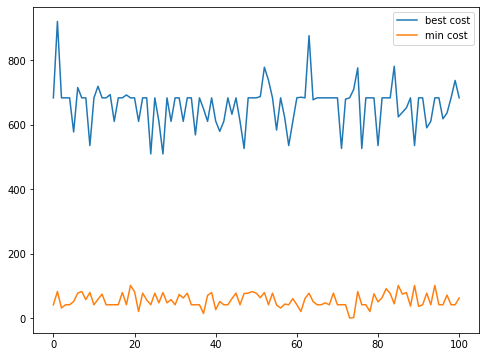

In [113]:
import matplotlib.pyplot as plt

#ploting the graph - 1.cost, min_cost with respect to generation number
plt.figure(figsize=(8, 6))
plt.plot(gen, cost, label='best cost')
plt.plot(gen, min_cost, label='min cost')
plt.legend()



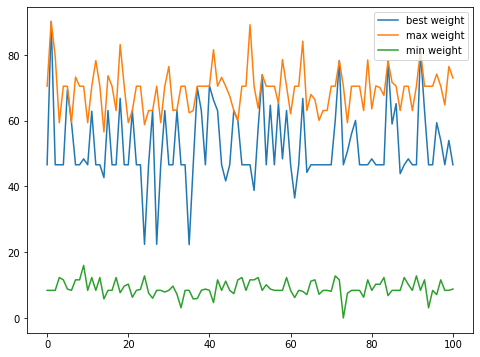

In [115]:
#ploting the graph - 2.max weight, best weight, min_weight with respect to generation number
plt.figure(figsize=(8, 6))
plt.plot(gen, best_weight, label='best weight')
plt.plot(gen, max_weight, label='max weight')
plt.plot(gen, min_weight, label='min weight')
plt.legend()

# Task 2 Particle Swarm optimization

Implement Particle swarm optimization algorithm and find the global minimum of the Rosenbrock's banana function.

In [126]:
# Example
def banana(xx):
  x = xx[0]
  y = xx[1]
  return x**4 - 2*y*x**2 + y**2 + x**2 - 2*x + 5

# limits for searching solution
lower_bound = [-5, -5]
upper_bound = [5, 5]


Define python function
```python
def lab6-pso(objective, l_bound, u_bound,
       swarmsize, dimension, 
       iterations=100, omega=0.5, phip=0.5, phig=0.5):
       return [best_global, obj_global]
```
Function arguments:

*   **objective** is the objective function, i.e. the banana function for us (see above)
*   **l_bound** - lower bound of the area for searching a solution
*   **u_bound** - upper bound of the area for searching a solution
*   **swarmsize** - number of particles in the swarm
*   **dimension** - the dimension of the searching space. Banana function is a function of two variables so that each particle is a two dimensional vector [x, y].
*   **interations** - a stop criterion of the algorithm, which will stop the algorithm after certain number of iterations 
*   **omega** - $\omega$ parameter of the algorithm
*   **phip** - $\phi_p$ parameter of the algorithm 
*   **phig** - $\phi_g$ parameter of the algorithm

### PSO Algorithm

1. **Initialize the swarm.** The swarm is an numpy array of shape ( $N_S, N_D$ ) of np.float64 data type. $N_S$ is swarmsize and $N_D = 2$ is the dimension of the position of the particle. Position of each particle is initialized randomly from uniform distribution within the area given by lower and upper bounds, i.e. a position of the particle (solution) is a vector $[x, y]$ where $x \in <-5.0,5.0>$ and $y \in <-5.0, 5.0>$.

2. **Set best_local variable for each particle.**
In this place it is a simple deep copy  of the swarm numpy matrix (swarm.copy()). 

3. **Evaluate the objective function for all particles in the swarm.** Simply said, call the objective function for each row in the swarm matrix and store them in the obj_local array (local best objective values).

4. **Find the index $i$ of minimum of the objective value in the array**, i.e. get the best solution of the swarm. Perform deep copy of the row at index $i$ to variable best_global and assign the objective value at index $i$ to variable obj_global. Both variables represent best global solution for the swarm. **Hint:** use the numpy.argmin function

5. **Initialize the velocity matrix $v_t$** for $t=-1$. This is a  numpy matrix of the shape of $(N_S, N_D)$ where $N_S$ and the type of numpy.float64
6. **Prepare the loop for all iterations.**. The loop body starts.

>> 6-1. **Generate random number matrixes** ${\bf r}_p \in <0,1>^{N_SN_D}$ and ${\bf r}_p \in <0,1>^{N_SN_D}$. 

>> 6-2. **Calculate velocities and positions of particles.** The particle velocity is given by equation
$${\bf v}_t=\omega {\bf v}_{t-1} + \phi_p{\bf r}_p(p_{\text{best}} - {\bf x}_t) + \phi_g{\bf r}_g(g_{\text{best}} - {\bf x}_t)
$$
where $p_{\text{best}}$ is the particle best solution (position), $g_{\text{best}}$ is the global best solution (position) and ${\bf x}_t$. The position of the particle is updated by
$$
  {\bf x}_{t+1}={\bf x}_t + {\bf v}_t
$$

>> 6-3. **Calculate objective function** for all particles and store them in the numpy array. Compare current objective values to values in the obj_local array. If new objective value is less than previously stored objective local value, update the obj_local array and also store new best_local position for the particle.

>> 6-4. **Find the index $i$ of minimum of the objective value in the array**, i.e. get the best solution of the swarm. If the minimum value is less than previously stored (in obj_global) perform deep copy of the row at index $i$ to variable best_global and assign the objective value at index $i$ to variable obj_global. Both variables represent best global solution for the swarm. **Hint:** use the numpy.argmin function.

>> 6-5. **Continue at point 6-1**, until the total number of iterations is reached.

7. **Return the best solution** (position and objective)


In [138]:
# Write your code here

def lab6_pso(objective, l_bound, u_bound, swarmsize, dimension, iterations=100, omega=0.5, phip=0.5, phig=0.5):
    # Initialize the swarm
    swarm = np.random.uniform(low=l_bound, high=u_bound, size=(swarmsize, dimension))
    best_local = swarm.copy()
    # Evaluate the objective function for all particles in the swarm
    obj_local = np.array([objective(particle) for particle in swarm])
    # Find the index of the minimum objective value and store it as the best global solution
    i = np.argmin(obj_local)
    best_global = swarm[i]
    obj_global = obj_local[i]
    # Initialize the velocity matrix
    v_t = np.zeros((swarmsize, dimension))
    # Perform the loop for all iterations
    for t in range(iterations):
        # Generate random number matrices
        r_p = np.random.random((swarmsize, dimension))
        r_g = np.random.random((swarmsize, dimension))
        # Calculate and update velocities and positions of particles
        v_t = omega * v_t + phip * r_p * (best_local - swarm) + phig * r_g * (best_global - swarm)
        swarm = swarm + v_t
        # Calculate the objective function for all particles and update the best local and global solutions
        obj_swarm = np.array([objective(particle) for particle in swarm])
        update = obj_swarm < obj_local
        obj_local[update] = obj_swarm[update]
        best_local[update] = swarm[update]
        i = np.argmin(obj_local)
        if obj_local[i] < obj_global:
            best_global = swarm[i]
            obj_global = obj_local[i]
        print(obj_global)
    # Return the best global solution and the objective value of the best global solution
    return [best_global, obj_global]

Run the PSO algorithm and print the best solution.

In [139]:
best_solution, best_obj_value = lab6_pso(objective=banana, l_bound=-5.0, u_bound=5.0, swarmsize=10, dimension=2)
print('Best Position',best_solution)
print('Best Object Value',best_obj_value)

5.479022876679479
4.295257917244144
4.295257917244144
4.033490957028448
4.033490957028448
4.0320890616533775
4.015122034852849
4.0037944835434
4.002435065485077
4.000062666417918
4.000062666417918
4.0000575890746575
4.0000575890746575
4.0000575890746575
4.0000575890746575
4.0000575890746575
4.0000097993699315
4.0000097993699315
4.000007896966247
4.000004717696308
4.000000768145382
4.0000003852783
4.000000112982654
4.0000000771450654
4.0000000771450654
4.000000046786298
4.000000012409615
4.000000008419188
4.000000008419188
4.000000000925112
4.000000000925112
4.000000000416515
4.000000000416515
4.0000000001415
4.000000000035758
4.000000000035758
4.000000000035758
4.000000000012334
4.000000000012334
4.0000000000115055
4.0000000000115055
4.000000000000757
4.000000000000757
4.000000000000757
4.000000000000099
4.000000000000045
4.000000000000045
4.000000000000011
4.000000000000011
4.000000000000011
4.000000000000011
4.000000000000005
4.000000000000002
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0


## Subtask 1

Use pyswarm package for the same task.

**Hint:** Do not use constraints. 




In [123]:
# Example
!pip install pyswarm
import pyswarm
from pyswarm import pso

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4480 sha256=10ca03364b1c0ca09f8f3f5ea74146395070c5dcd533650666ba997acbd32335
  Stored in directory: /root/.cache/pip/wheels/3b/48/7f/a9f4beb272837304aa8e55fda9c9b4243d23517d5b1349b052
Successfully built pyswarm


In [140]:
lb = [-5, -5]
ub = [5, 5]
best_solution, best_obj_value = pyswarm.pso(banana, lb, ub)

print('Solution',best_solution)
print('Objective',best_obj_value)

Stopping search: Swarm best objective change less than 1e-08
Solution [1.00016916 1.00062138]
Objective 4.000000108722768
